In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, '/SSF')
from DejaVu.explib import get_eval_results
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.min_rows = 100
eval_rets, melted = get_eval_results()
eval_rets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
download finished


,Method,Dataset,备注,A@1,A@2,A@3,A@5,MAR,Time (s),实验路径,command,commit
1,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,65.62,93.75,96.88,100.00,1.44,689.115095,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/1975683694...
2,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,78.12,90.62,90.62,90.62,1.78,1266.835076,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
3,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,90.62,96.88,96.88,100.00,1.16,761.576768,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
4,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,674.506719,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
5,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,849.394423,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
6,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,84.38,96.88,100.00,100.00,1.19,709.856903,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
7,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,59.38,78.12,87.50,96.88,1.84,718.702528,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
8,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,824.153796,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
9,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,2025.395798,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
10,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,75.00,90.62,93.75,93.75,1.53,1744.798878,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...


In [3]:
import re

REGEX = r'^(TSS(?P<tss>[\d.]+)\+)?GRU\+GAT-H4-L8?\+BAL$'
def __match_tss(name: str):
    if __match := re.match(REGEX, name):
        __gd = dict(__match.groupdict())
        return float(__gd['tss']) if 'tss' in __gd and __gd['tss'] is not None else 1.
    else:
        return 0
    
def match(the_df):
    the_df = the_df.copy()
    the_df['tss'] = the_df.Method.map(
        lambda name: __match_tss(name)
    )
    for m in ['MAR', 'A@1', 'A@2', 'A@3', 'A@5']:
        the_df[m] = pd.to_numeric(the_df[m], errors='coerce')
    return the_df

In [4]:
df1 = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS20-phase1'
)])
df1 = df1.groupby(['tss', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean()
df2 = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS20-phase2'
)])

df2 = df2.groupby(['tss', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean()
dfa = (df1 * 32 + df2 * 46) / (32 + 46)
dfa = dfa.reset_index()
display(dfa)

,tss,Method,MAR,A@1,A@2,A@3,A@5
0,0.01,TSS0.01+GRU+GAT-H4-L8+BAL,39.157179,11.409718,16.283051,18.846949,20.898821
1,0.02,TSS0.02+GRU+GAT-H4-L8+BAL,43.536282,9.358410,10.897026,13.077744,14.488282
2,0.04,TSS0.04+GRU+GAT-H4-L8+BAL,34.306231,12.179590,17.179667,19.743949,27.051718
3,0.08,TSS0.08+GRU+GAT-H4-L8+BAL,22.652872,25.641128,36.153923,40.512308,46.794026
4,0.16,TSS0.16+GRU+GAT-H4-L8+BAL,7.113487,48.847179,63.334128,68.846282,75.768615
5,0.32,TSS0.32+GRU+GAT-H4-L8+BAL,4.407718,58.462641,72.564333,76.666564,82.435744
6,0.64,TSS0.64+GRU+GAT-H4-L8+BAL,2.149000,71.026615,84.743923,88.844410,92.946795
7,1.00,GRU+GAT-H4-L8+BAL,1.656859,77.178667,90.383654,93.397115,96.282474


In [5]:
df = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS21-B'
)])

dfb = df.groupby(['tss', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean().reset_index()
display(dfb)

,tss,Method,MAR,A@1,A@2,A@3,A@5
0,0.01,TSS0.01+GRU+GAT-H4-L8+BAL,70.298,13.486,14.850,15.758,19.394
1,0.02,TSS0.02+GRU+GAT-H4-L8+BAL,77.441,6.973,7.881,9.244,11.516
2,0.04,TSS0.04+GRU+GAT-H4-L8+BAL,63.417,8.031,10.152,13.789,15.908
3,0.08,TSS0.08+GRU+GAT-H4-L8+BAL,42.341,18.182,22.880,26.212,30.911
4,0.16,TSS0.16+GRU+GAT-H4-L8+BAL,21.472,35.606,43.183,48.788,54.092
5,0.32,TSS0.32+GRU+GAT-H4-L8+BAL,7.424,51.364,60.153,67.122,74.243
6,0.64,TSS0.64+GRU+GAT-H4-L8+BAL,6.608,64.397,71.971,75.909,79.090
7,1.00,GRU+GAT-H4-L8+BAL,5.027,66.212,71.213,75.606,79.242


In [6]:
df = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'CCB-Oracle'
)])

dfc = df.groupby(['tss', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean().reset_index()
display(dfc)

,tss,Method,MAR,A@1,A@2,A@3,A@5
0,0.01,TSS0.01+GRU+GAT-H4-L8+BAL,16.272,11.051,21.577,27.368,32.631
1,0.02,TSS0.02+GRU+GAT-H4-L8+BAL,13.442,14.998,23.684,31.053,40.000
2,0.04,TSS0.04+GRU+GAT-H4-L8+BAL,11.039,23.948,33.947,38.945,52.369
3,0.08,TSS0.08+GRU+GAT-H4-L8+BAL,6.232,23.683,32.632,41.316,62.895
4,0.16,TSS0.16+GRU+GAT-H4-L8+BAL,3.744,45.001,58.684,65.526,77.632
5,0.32,TSS0.32+GRU+GAT-H4-L8+BAL,2.672,44.738,66.580,77.369,88.686
6,0.64,TSS0.64+GRU+GAT-H4-L8+BAL,2.345,53.158,70.000,81.842,92.107
7,1.00,GRU+GAT-H4-L8+BAL,1.697,61.842,82.632,90.791,96.318


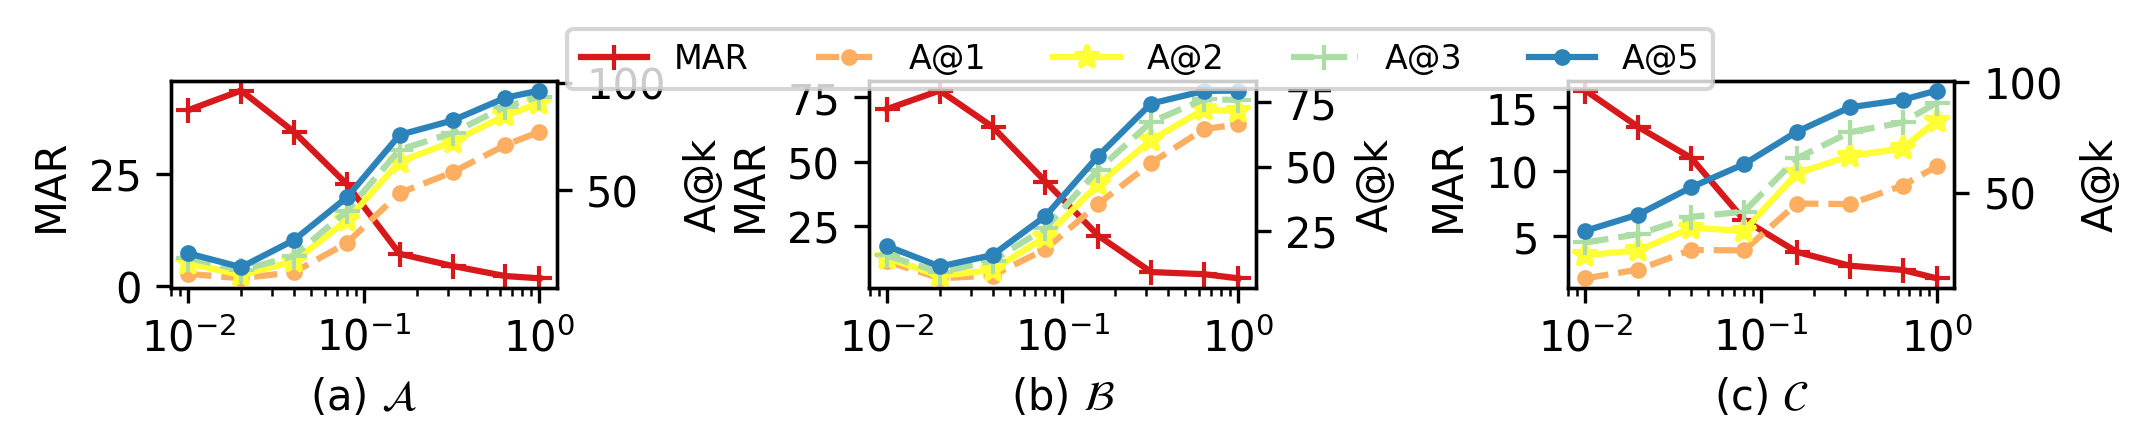

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from explib import get_line_style, legend_db
import matplotlib.ticker as mticker

def plot_impact_of_tss(data, ax, fig, legend=False):
    data = data.copy()
    # data = data[data.Z.isin({2, 3, 4, 8, 16, 32, 64})]
    data = data.sort_values('tss')
    p1, = ax.plot(data.tss, data.MAR, marker='+', ls='-', label='MAR', c=legend_db.colors[0])
    # ax.set_ylim([data['MAR'].mean() / 2, data['MAR'].mean() * 1.5])
    ax.set_ylabel('MAR')
#     ax.legend(bbox_to_anchor=(1.1, 1))
    ax.set_xscale("log")
    # ax.set_xticks([2, 3, 4, 8, 16, 32, 64], minor=False)
    # ax.set_xticklabels(["2", "3", "4", "8", "16", "32", "64"], minor=False)
    
    ax2 = ax.twinx()
    p2, = ax2.plot(data.tss, data['A@1'], marker='.', ls='--', label='A@1', c=legend_db.colors[1])
    p3, = ax2.plot(data.tss, data['A@2'], marker='*', ls='-', label='A@2', c=legend_db.colors[2])
    p4, = ax2.plot(data.tss, data['A@3'], marker='+', ls='--', label='A@3', c=legend_db.colors[3])
    p5, = ax2.plot(data.tss, data['A@5'], marker='.', ls='-', label='A@5', c=legend_db.colors[4])
    ax2.set_ylabel('A@k')
#     ax.set_xticks([2, 3, 4, 8, 16, 32, 64], minor=False)
#     ax.set_xticklabels(["2", "3", "4", "8", "16", "32", "64"], minor=False)
#     ax.xaxis.set_major_locator(mticker.FixedLocator([2, 3, 4, 8, 16, 32, 64]))
    if legend:
        fig.legend(handles=[p1, p2, p3, p4, p5], bbox_to_anchor=(0.25, 0.88), loc='lower left', prop={'size': 8}, ncol=5)
    
#     fig.legend(loc="upper right", bbox_to_anchor=(1, 0.6), bbox_transform=ax.transAxes, ncol=3, fontsize='small')
#     plt.xticks([2, 3, 4, 5, 6], [2, 3, 4, 5, 6])
#     plt.xlim([2, 65])
#     plt.xscale("log")
#     plt.show()
    # plt.close(fig)
    return ax, ax2

fig, axes = plt.subplots(1, 3, figsize=(7, 1.2), dpi=300, sharey=False)
ax1, ax2 = plot_impact_of_tss(dfa, axes[0], fig, legend=True)
# ax2.get_yaxis().set_visible(False)
ax3, ax4 = plot_impact_of_tss(dfb, axes[1], fig)
# ax4.get_yaxis().set_visible(False)
ax5, ax6 = plot_impact_of_tss(dfc, axes[2], fig)
# ax2.get_shared_y_axes().join(ax2, ax4, ax6)
ax1.set_xlabel("(a) $\mathcal{A}$")
ax3.set_xlabel("(b) $\mathcal{B}$")
ax5.set_xlabel("(c) $\mathcal{C}$")
plt.tight_layout(pad=0.1)
plt.savefig("/SSF/output/impact_of_tss/impact_of_tss.pdf", bbox_inches='tight', pad_inches=0)
plt.show(fig)
plt.close(fig)

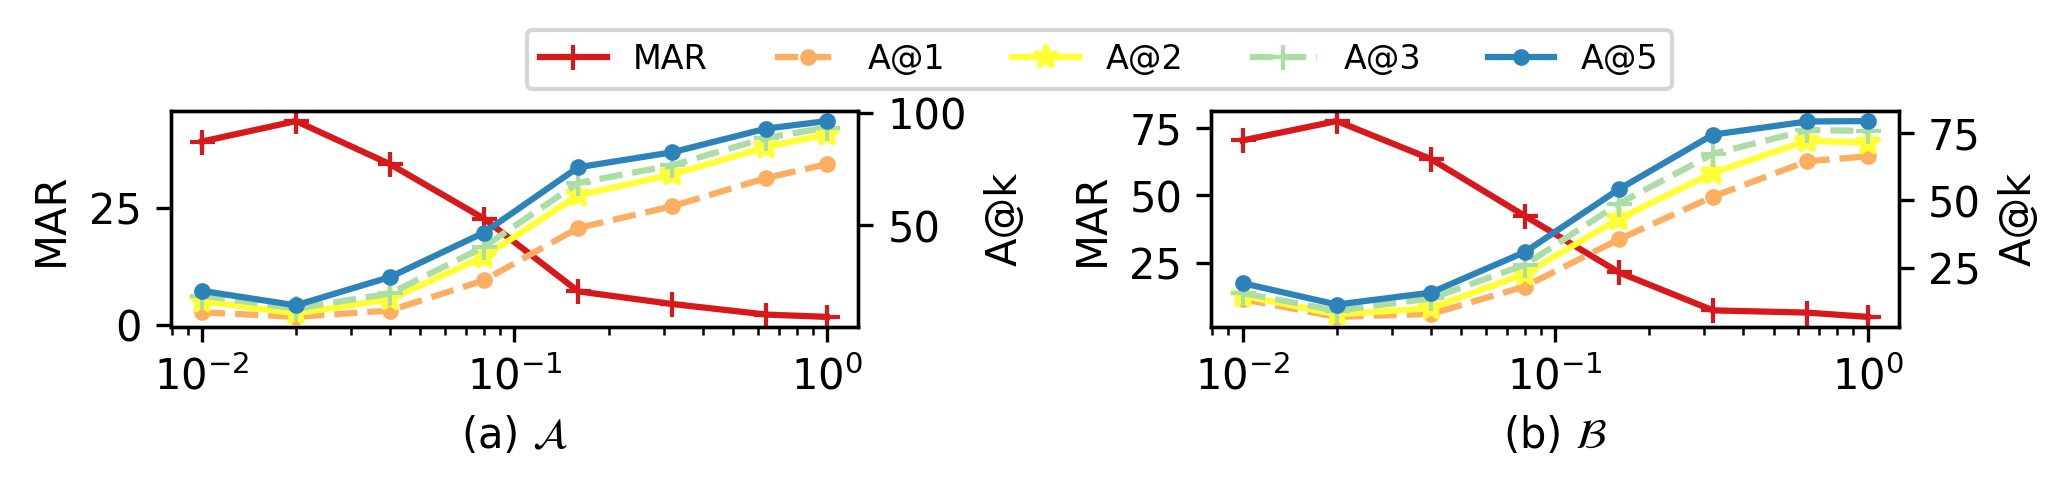

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(7, 1.5), dpi=300, sharey=False)
ax1, ax2 = plot_impact_of_tss(dfa, axes[0], fig, legend=True)
# ax2.get_yaxis().set_visible(False)
ax3, ax4 = plot_impact_of_tss(dfb, axes[1], fig)
# ax4.get_yaxis().set_visible(False)
ax1.set_xlabel("(a) $\mathcal{A}$")
ax3.set_xlabel("(b) $\mathcal{B}$")
plt.tight_layout()
plt.savefig("/SSF/output/impact_of_tss/impact_of_tss.pdf", bbox_inches='tight', pad_inches=0)
plt.show(fig)
plt.close(fig)

In [ ]:
import re
def __match_tss(name: str):
    if __match := re.match(r'^GAT-H4-L8(\+tss(?P<tss>[0-9]+\.?[0-9]*))?\+AUG\+BAL$', name):
        __gd = dict(__match.groupdict())
        # print(__gd)
        return 1.0 if __match['tss'] is None else float(__match['tss'])
    else:
        return 0

def match_tss(the_df):
    the_df = the_df.copy()
    the_df['tss'] = the_df.Method.map(
        lambda name: __match_tss(name)
    )
    return the_df

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from explib import get_line_style, legend_db
import matplotlib.ticker as mticker

def plot_impact_of_tss(data):
    data = data.copy()
    data = data.sort_values('tss')
    fig = plt.figure(figsize=(4.5, 1.1), dpi=300)
    ax = plt.axes()
    p1, = ax.plot(data.tss, data.MAR, marker='+', ls='-', label='MAR', c=legend_db.colors[0])
    
    ax = ax.twinx()
    p2, = ax.plot(data.tss, data['A@1'], marker='.', ls='--', label='A@1', c=legend_db.colors[1])
    p3, = ax.plot(data.tss, data['A@2'], marker='*', ls='-', label='A@2', c=legend_db.colors[2])
    p4, = ax.plot(data.tss, data['A@3'], marker='+', ls='--', label='A@3', c=legend_db.colors[3])
    p5, = ax.plot(data.tss, data['A@5'], marker='.', ls='-', label='A@5', c=legend_db.colors[4])
    
    ax.legend(handles=[p1, p2, p3, p4, p5], bbox_to_anchor=(-0.05, 1), loc='lower left', prop={'size': 8}, ncol=5)
    
    plt.close(fig)
    return fig

In [ ]:
df1 = match_tss(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(r'^GAT-H4-L8(\+tss(?P<tss>[0-9.]+))?\+AUG\+BAL$', _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS20-phase1'
)])

df1 = df1.groupby(['tss', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean()
df2 = match_tss(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(r'^GAT-H4-L8(\+tss(?P<tss>[0-9.]+))?\+AUG\+BAL$', _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS20-phase2'
)])

df2 = df2.groupby(['tss', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean()
df = (df1 * 32 + df2 * 46) / (32 + 46)
df = df.reset_index()
display(df)
fig = plot_impact_of_tss(df)
fig.savefig('../output/impact_of_tss/A.pdf', bbox_inches='tight', pad_inches=0)
display(fig)

In [ ]:
df = match_tss(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(r'^GAT-H4-L8(\+tss(?P<tss>[0-9.]+))?\+AUG\+BAL$', _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS21-B'
)])

df = df.groupby(['tss', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean().reset_index()
display(df)
fig = plot_impact_of_tss(df)
fig.savefig('../output/impact_of_tss/B.pdf', bbox_inches='tight', pad_inches=0)
display(fig)

In [ ]:
df = match_tss(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(r'^GAT-H4-L8(\+tss(?P<tss>[0-9.]+))?\+AUG\+BAL$', _) is not None)
) & (
    eval_rets.Dataset == 'CCB-Oracle'
)])

df = df.groupby(['tss', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean().reset_index()
display(df)
fig = plot_impact_of_tss(df)
fig.savefig('../output/impact_of_tss/C.pdf', bbox_inches='tight', pad_inches=0)
display(fig)